<a href="https://colab.research.google.com/github/Rajulearner/__tensorflow__/blob/master/tensor_flow_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

In [ ]:
mnst = keras.datasets.fashion_mnist

In [ ]:
type(mnst)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=mnst.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape, x_test.shape

((60000,), (10000, 28, 28))

In [ ]:
np.max(x_train)

255

In [ ]:
class_name = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

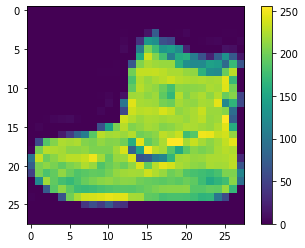

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
y_train
# as we defined ankle boot in 9th place, as per the y_train data we are getiing the ankle boot

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train = x_train/255.0

In [ ]:
x_test = x_test

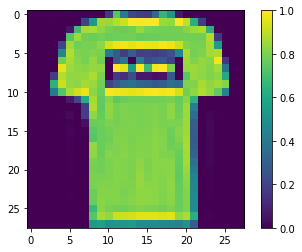

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

#Building the tensorflow model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
#in sequential we can pass array, by definig array we can set layers.

#it transforms the data(input_shape of (28*28)) into one-dimensional, so that we can fit into next layer.
model.add(Flatten(input_shape =(28,28)))
#Activation function
model.add(Dense(128, activation='relu'))#128 neurons
model.add(Dense(10, activation='softmax'))#output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compilation
 

*   Loss function
*   optimize
*   metrics

In [ ]:
#It will measure how accurate the model is during training and testing
#loss func. minimizes the error during tarinig, So that we can decrease the
#error in testing too. But this is not always true, in the case of overfitting
#so we gonna use optimizer.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model
model.fit(x_train, y_train, epochs=5)
#the weights get initialized randomly assigned in first epoch,and when the model 
#moves to second epoch by using the back-propagation it updates the model.
#If we give epoch=10, that means the weights get updated 10 times by improving in each iteration.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4975 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3740 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8909


In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 50.3746 - accuracy: 0.8665


In [ ]:
test_acc, test_loss

(0.8665000200271606, 50.374603271484375)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
accuracy_score(y_test,y_pred)

0.8665

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
np.argmax(pred[2])

1